# Advanced Machine Learning
## Exercise Sheet 9

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from KarlBoost import KarlBoost
from CarlitoBoost import CarlitoBoost

## Playing around

In [2]:
X, Y = make_circles(n_samples=1_000, noise=0.2, factor=0.2)
Y = np.where(Y == 1, 1, -1)

np.unique(Y)

array([-1,  1])

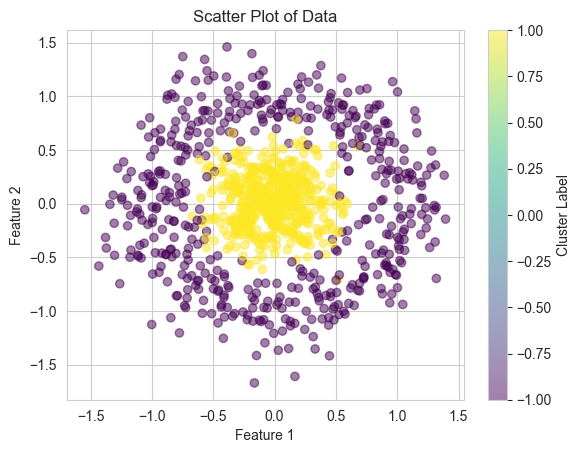

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.5, cmap='viridis')

plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

In [4]:
max_depth = 4

clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
clf.fit(X, Y)

DecisionTreeClassifier(max_depth=4)

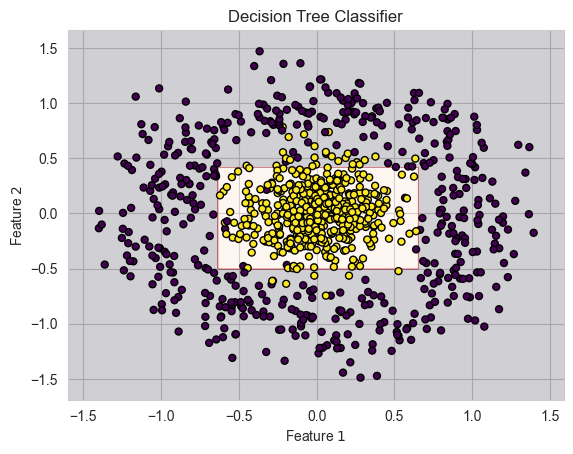

In [10]:
# Create a mesh grid
pad = 0.2
x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2)

# Overlay the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, s=25, edgecolor='k', cmap='viridis')
plt.title('Decision Tree Classifier')
plt.xlabel('Feature $1$')
plt.ylabel('Feature $2$')
plt.show()

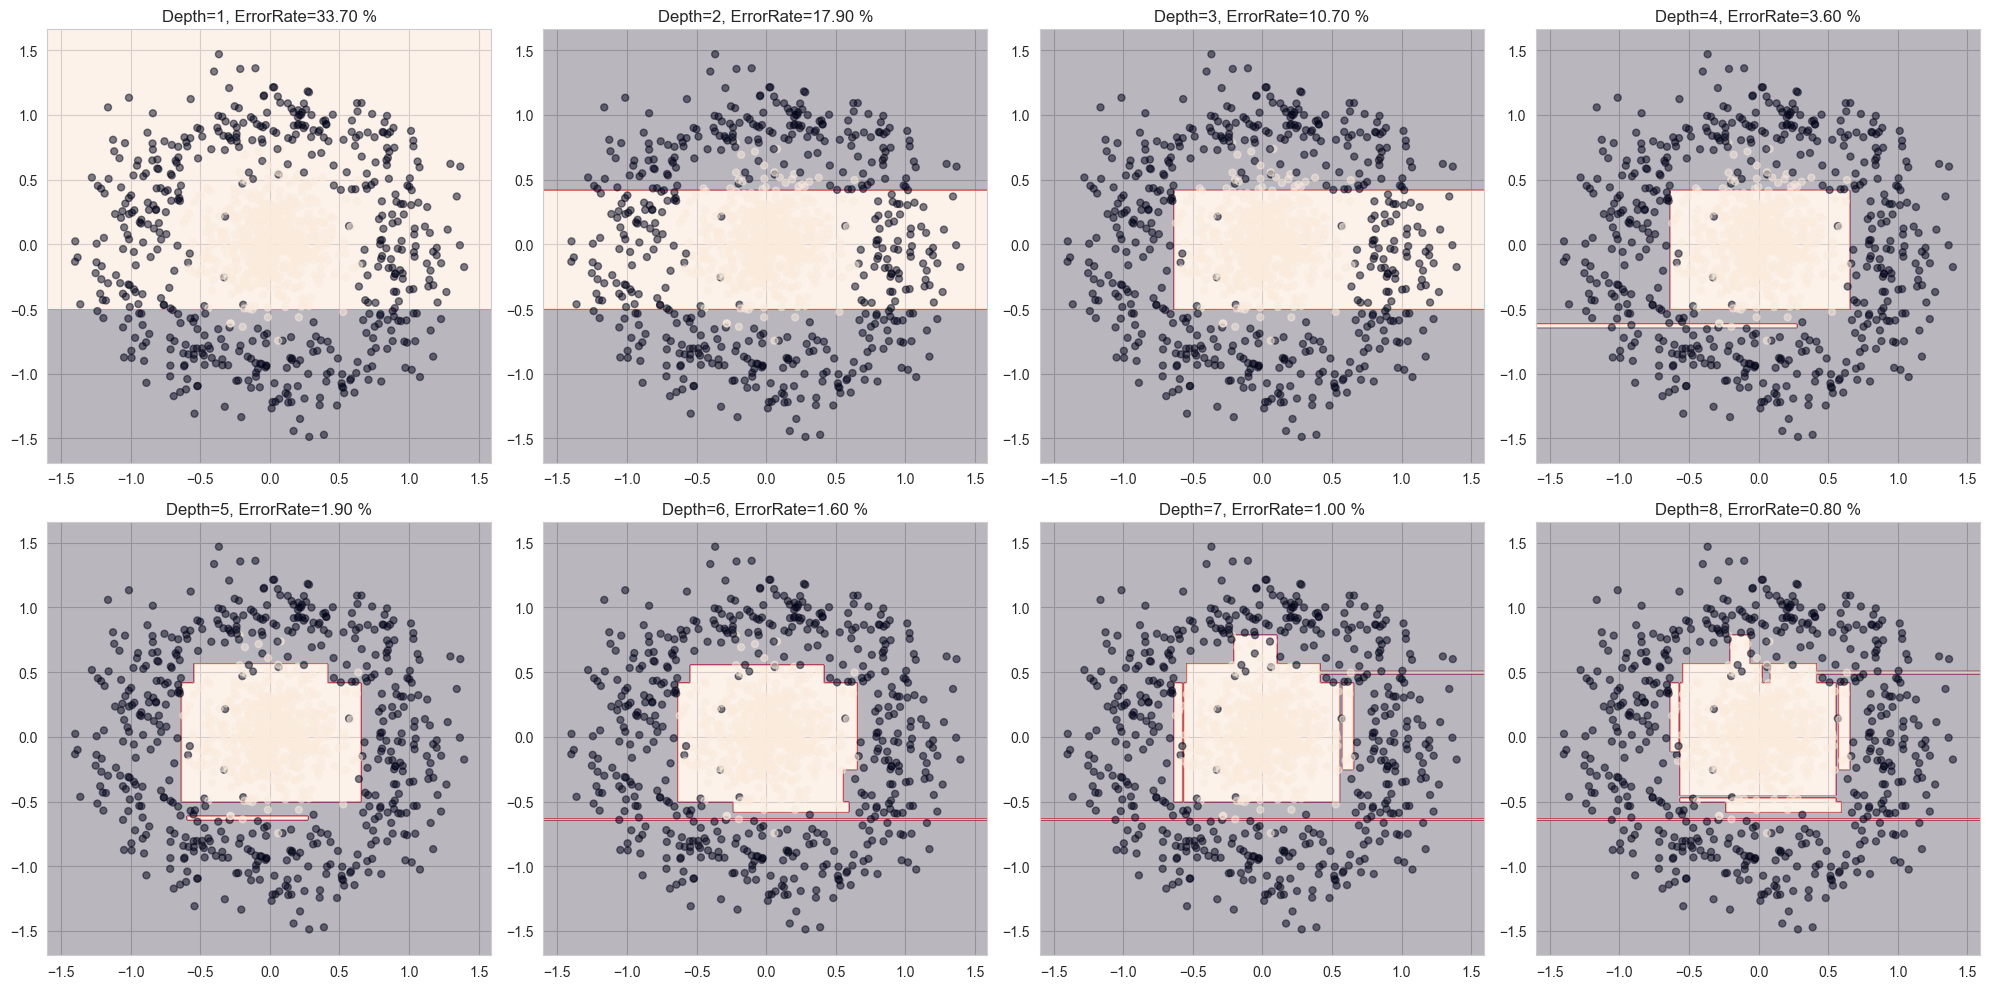

In [11]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns for the subplots

for i, ax in enumerate(axs.flatten()):
    # Train classifier for the current depth
    max_depth = i + 1
    clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    clf.fit(X, Y)
    error_rate = 1 - accuracy_score(Y, clf.predict(X))

    # Predict class for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3)

    # Overlay the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=25, alpha=0.5)
    # ax.set_title(f'Decision Tree Classifier (max_depth={max_depth})')
    ax.set_title(f"Depth={max_depth}, ErrorRate={error_rate*100:.2f} %")
    # ax.set_xlabel('Feature $1$')
    # ax.set_ylabel('Feature $2$')

plt.tight_layout()
plt.show()

In [12]:
clf = AdaBoostClassifier(n_estimators=1)
clf.fit(X, Y)

AdaBoostClassifier(n_estimators=1)

## Exercise 2

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
n_estimators = 10

clf_sklearn = AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME')
clf_sklearn.fit(X_train, y_train)

clf_karl = KarlBoost(T=n_estimators)
clf_karl.fit(X_train, y_train)

clf_carlito = CarlitoBoost(T=n_estimators, base_learner=DecisionTreeClassifier, base_learner_args={'max_depth': 5})
clf_carlito.fit(X_train, y_train)

for classifier in [clf_sklearn, clf_karl, clf_carlito]:
    y_hat = classifier.predict(X_test)
    classifier_name = type(classifier).__name__  # Get the class name of the classifier
    print(f"Accuracy {classifier_name:<20}: {np.mean(y_hat == y_test)*100:.3f} %")

Accuracy AdaBoostClassifier  : 91.500 %
Accuracy KarlBoost           : 81.000 %
Accuracy CarlitoBoost        : 95.500 %


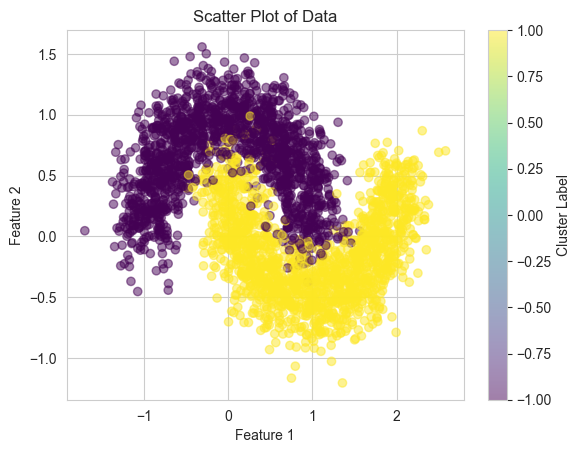

In [22]:
from sklearn.datasets import make_moons, make_circles

n_samples = 3_000

# X, Y = make_circles(n_samples=n_samples, noise=0.2, factor=0.2)
X, Y = make_moons(n_samples=n_samples, noise=0.2)

Y = np.where(Y == 1, 1, -1)
np.unique(Y)

# Plotting the data.
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.5, cmap='viridis')

plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

n_splits = 10
n_estimators = 10
kf = KFold(n_splits=n_splits)

# CarlitoBoost base learner
#'''
from sklearn.neighbors import KNeighborsClassifier
CarlitoBoost_args = {'n_neighbors': 5}  # You can specify other KNN parameters here
CarlitoBoost_baselearner = KNeighborsClassifier
'''
CarlitoBoost_args = {'max_depth': 3}
CarlitoBoost_baselearner = DecisionTreeClassifier
'''

# Initialize dictionaries to store accuracies
accuracies = {
    'AdaBoostClassifier': [],
    'KarlBoost': [],
    'CarlitoBoost': []
}

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Train and evaluate AdaBoostClassifier
    clf_sklearn = AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME')
    clf_sklearn.fit(X_train, y_train)
    y_hat = clf_sklearn.predict(X_test)
    accuracies['AdaBoostClassifier'].append(accuracy_score(y_test, y_hat))

    # Train and evaluate KarlBoost
    clf_karl = KarlBoost(T=n_estimators)
    clf_karl.fit(X_train, y_train)
    y_hat = clf_karl.predict(X_test)
    accuracies['KarlBoost'].append(accuracy_score(y_test, y_hat))

    # Train and evaluate CarlitoBoost
    clf_carlito = CarlitoBoost(T=n_estimators, base_learner=CarlitoBoost_baselearner, base_learner_args=CarlitoBoost_args)
    clf_carlito.fit(X_train, y_train)
    y_hat = clf_carlito.predict(X_test)
    accuracies['CarlitoBoost'].append(accuracy_score(y_test, y_hat))

# Calculate and print mean accuracies
for classifier_name, scores in accuracies.items():
    print(f"Mean Accuracy {classifier_name:<20}: {np.mean(scores) * 100:.3f} %")

Mean Accuracy AdaBoostClassifier  : 89.900 %
Mean Accuracy KarlBoost           : 89.800 %
Mean Accuracy CarlitoBoost        : 94.767 %


## Exercise 3

In [18]:
from sklearn.datasets import load_digits

In [19]:
digits = load_digits()

Text(0.5, 1.0, 'True Label: 8')

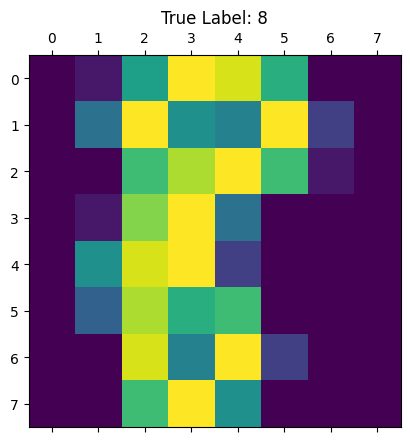

In [20]:
index = 96

plt.matshow(digits.images[index])
plt.title(f"True Label: {digits.target[index]}")

In [21]:
X, y = digits.images, digits.target

# Flattening 8x8 array into 64 array
X = X.reshape((X.shape[0], -1))

# Altering class labels
y = np.where(y < 5, -1, +1)

## 3 (a)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
clf_1_test, clf_1_train = {}, {}
clf_5_test, clf_5_train = {}, {}

for n_estimators in np.arange(start=1, stop=100, step=1):
    # Fit and test AdaBoost with decision stumps
    clf_1 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n_estimators)
    clf_1.fit(X_train, y_train)
    clf_1_train[n_estimators] = 1 - accuracy_score(y_train, clf_1.predict(X_train))
    clf_1_test[n_estimators] = 1 - accuracy_score(y_test, clf_1.predict(X_test))

    # Fit and test AdaBoost with decision trees of depth 3
    clf_5 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=n_estimators)
    clf_5.fit(X_train, y_train)
    clf_5_train[n_estimators] = 1 - accuracy_score(y_train, clf_5.predict(X_train))
    clf_5_test[n_estimators] = 1 - accuracy_score(y_test, clf_5.predict(X_test))

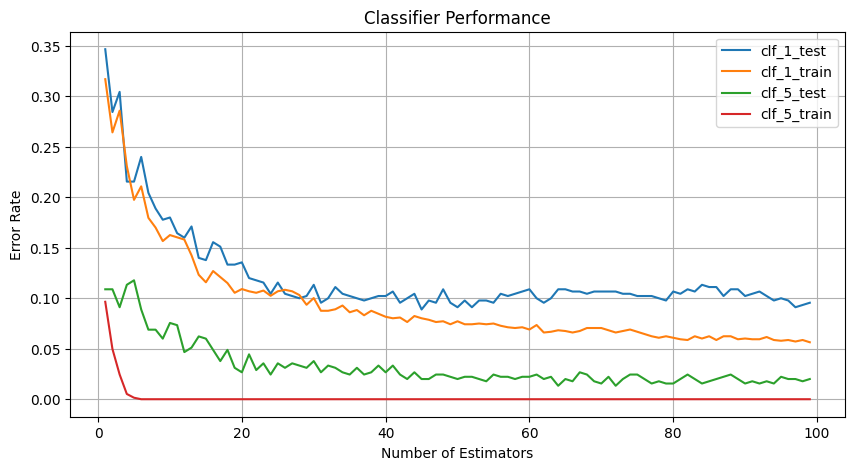

In [14]:
plt.figure(figsize=(10, 5))

plt.plot(list(clf_1_test.keys()), list(clf_1_test.values()), label='clf_1_test')
plt.plot(list(clf_1_train.keys()), list(clf_1_train.values()), label='clf_1_train')
plt.plot(list(clf_5_test.keys()), list(clf_5_test.values()), label='clf_5_test')
plt.plot(list(clf_5_train.keys()), list(clf_5_train.values()), label='clf_5_train')

plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.title('Classifier Performance')
plt.legend()
plt.grid(True)

plt.show()

## 3 (b)

In [23]:
from sklearn.model_selection import KFold

In [25]:
kf = KFold(n_splits=10)
depths = [1, 3, 5, 10]
training_errors = dict()

for depth in depths:
    print(f"Working on depth {depth}...")
    training_errors[depth] = {}

    for n_estimators in np.arange(start=1, stop=20, step=1):
        model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=depth),
                                   n_estimators=n_estimators)

        training_error = []
        test_error = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)

            training_error.append(np.mean(model.predict(X_train) != y_train))
            test_error.append(np.mean(model.predict(X_test) != y_test))

        # Store the average errors for this configuration
        training_errors[depth][n_estimators] = {
            'average_training_error': np.mean(training_error),
            'average_test_error': np.mean(test_error)
        }

Working on depth 1...
Working on depth 3...
Working on depth 5...
Working on depth 10...


In [27]:
import pandas as pd

# Flatten the training_errors dictionary into a list of dictionaries
data = []
for depth in training_errors:
    for n_estimators in training_errors[depth]:
        data.append({
            'Depth': depth,
            'N_Estimators': n_estimators,
            'Average_Training_Error': training_errors[depth][n_estimators]['average_training_error'],
            'Average_Test_Error': training_errors[depth][n_estimators]['average_test_error']
        })

# Convert to DataFrame
df = pd.DataFrame(data)

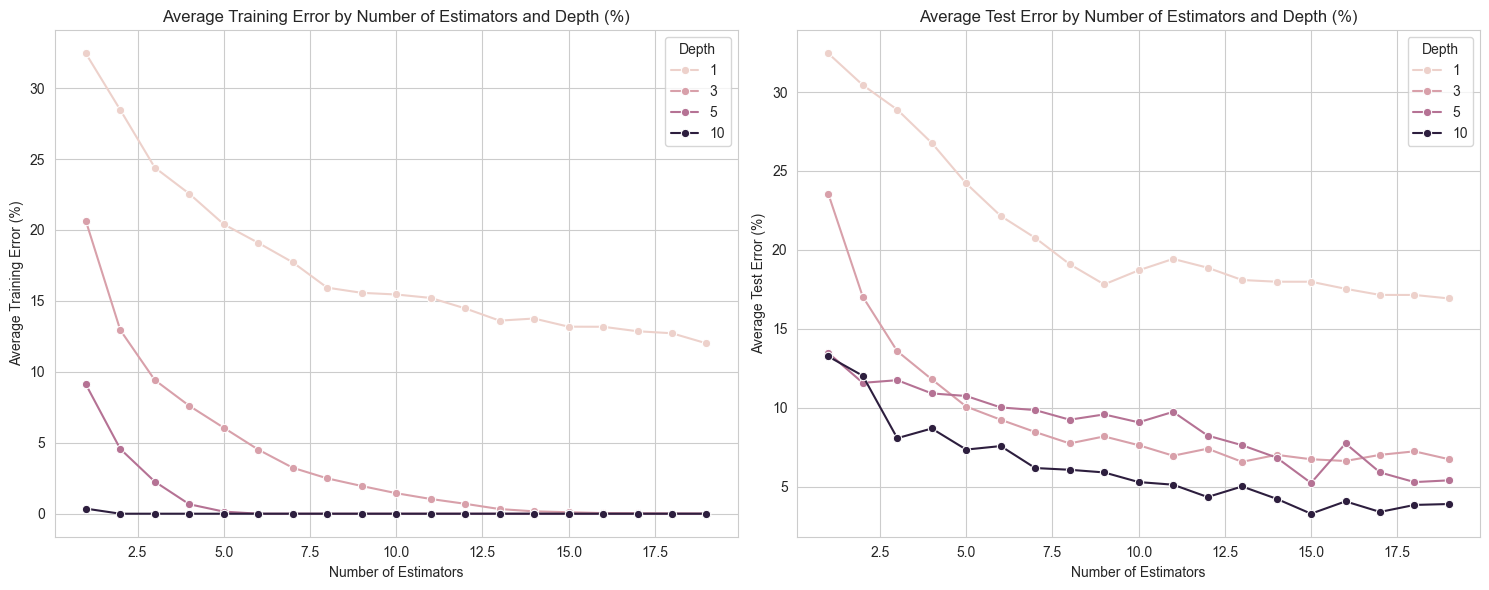

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Convert errors to percentages
df['Average_Training_Error'] *= 100
df['Average_Test_Error'] *= 100

# Create a figure with two subplots, with errors in percentage
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for training error in percentage
sns.lineplot(ax=axes[0], data=df, x='N_Estimators', y='Average_Training_Error', hue='Depth', marker='o')
axes[0].set_title('Average Training Error by Number of Estimators and Depth (%)')
axes[0].set_xlabel('Number of Estimators')
axes[0].set_ylabel('Average Training Error (%)')
axes[0].legend(title='Depth')

# Plot for test error in percentage
sns.lineplot(ax=axes[1], data=df, x='N_Estimators', y='Average_Test_Error', hue='Depth', marker='o')
axes[1].set_title('Average Test Error by Number of Estimators and Depth (%)')
axes[1].set_xlabel('Number of Estimators')
axes[1].set_ylabel('Average Test Error (%)')
axes[1].legend(title='Depth')

plt.tight_layout()
plt.show()